In [1]:
import cvxpy as cp
from numpy import log2
from choi import * #custom
import matplotlib.pyplot as plt

We denote by $\mathcal{P}(\mathcal{H})$ the set of positive semidefinite operators acting on a Hilbert Space $\mathcal{H}$.

Let $\mathcal{N}: A \rightarrow B$ be a quantum channel with Choi operator $\tau_{AB}^\cal{N}$. 

Then
  
  \begin{align}
    \begin{aligned}
  \mathcal{Q}(\cal{N}) \leq \log \varGamma (\cal{N})
    \end{aligned}
   \end{align}
   
Where $\varGamma (\cal{N})$ is given by


  \begin{align}
    \begin{aligned}
    \text{minimize: }\mu \\ \text{subject to: } & \mu \in \mathbb{R} \\ & V_{AB}, Y_{AB} \in \mathcal{P}(\mathcal{H}_A \otimes \mathcal{H}_B) \\ & (V_{AB} - Y_{AB})^{T_B} \geq \tau_{AB}^\cal{N} \\ & V_A + Y_A \leq \mu {\mathbb{I}}_A
    \end{aligned}
   \end{align}

We solve this semidefinite program using PICOS.

In [2]:
d = 5
D = d**2

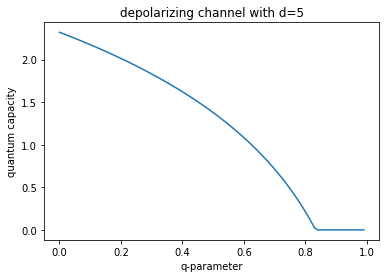

In [3]:
c = []
q_vals = np.array(range(100)) * 0.01

Vab = cp.Variable((D,D), symmetric=True)
Yab = cp.Variable((D,D), symmetric=True)
mu = cp.Variable()
iMat = np.identity(d)

Va = cp.partial_trace(Vab, (d,d), 1)
Ya = cp.partial_trace(Yab, (d,d), 1)

for q in q_vals:
    choi_mat = choi(d,q,depol)
    constraints = [Vab >> 0]
    constraints += [Yab >> 0]
    constraints += [cp.partial_transpose(Vab - Yab, (d,d), 1) >> choi_mat]
    constraints += [Va + Ya << mu * iMat]
    prob = cp.Problem(cp.Minimize(mu),
                  constraints)
    prob.solve()
    c.append(log2(prob.value))
    

plt.plot(q_vals,c)

plt.title('depolarizing channel with d=' + str(d))
plt.xlabel('q-parameter')
plt.ylabel('quantum capacity')

plt.show()

In [56]:
#simple

d = 2
choi_mat = choi(d,0.01,depol)



D = d**2
Vab = cp.Variable((D,D), symmetric=True)
Yab = cp.Variable((D,D), symmetric=True)
mu = cp.Variable()
iMat = np.identity(d)

Va = cp.partial_trace(Vab, (d,d), 1)
Ya = cp.partial_trace(Yab, (d,d), 1)

constraints = [Vab >> 0]
constraints += [Yab >> 0]

constraints += [cp.partial_transpose(Vab - Yab, (d,d), 1) >> choi_mat]

constraints += [Va + Ya << mu * iMat]

prob = cp.Problem(cp.Minimize(mu),
                  constraints)
prob.solve()

print(log2(prob.value))

0.9891395447699255
